In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

We'll take a look at some measures of dispersion here - or how spread out is our data. 
Are all of our values closely grouped together, or are they spread all over the place?

We'll consider two sets of data here: the height of NBA players and the height of NFL players. 
Think about what we can know going in... hint: there's some really, really tall basketball players.

In [3]:
#Import the two datasets
dfNBA = pd.read_csv("NBA.csv")
dfNBA.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [4]:
#Import the two datasets
dfNFL = pd.read_csv("NFL.csv")
dfNFL.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN


For now, we don't really care about anything but height, so we'll just make an array for each.
The dataframes are still there, you'll use them later.

In [5]:
#Take the height column
nba = np.array(dfNBA["Height"])
nfl = np.array(dfNFL["Height (inches)"])
#Dump the non-numbers
nba = nba[~np.isnan(nba)]
nfl = nfl[~np.isnan(nfl)]

In [6]:
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


Well that's not great. NBA players probably aren't 2.5 times taller than NFL players.
We need to correct between inches and cm.
We're metric people, so we'll make the NFLers into cm. 

In [7]:
#There are lots of ways to do this. It is called mapping a function, or applying a function to every value
#Because ours is very simple, this shortcut works.
#The syntax of doing this with more complex functions can get very confusing, so internet examples might be complex
nfl = nfl*2.54

Alright, try again...

In [8]:
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 186.71133325502174


Use the cell below and determine the range of both the datasets. 

In [22]:
#Determine ranges
print("NBA Range Height: "+str(np.max(nba))+" to " +str(np.min(nba)) )
print("NFL Range Height: "+str(np.max(nfl))+" to " +str(np.min(nfl)) )

NBA Range Height: 222.5 to 172.5
NFL Range Height: 208.28 to 154.94


The averages, shown in cm, are around 6'6" for the NBA, and 6'1" for the NFL
This makes some sense, NBA players are often really tall

We can picture the distribution of heights with some histograms...

In [10]:
nbahist = thinkstats2.Hist(nba, label='NBA Height')
nflhist = thinkstats2.Hist(nfl, label='NFL Height')

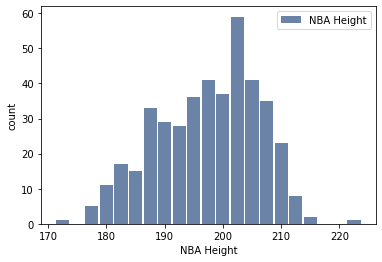

In [11]:
thinkplot.Hist(nbahist)
thinkplot.Config(xlabel='NBA Height', ylabel='count')

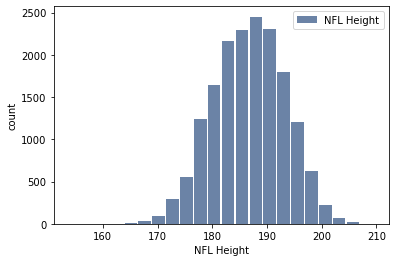

In [12]:
thinkplot.Hist(nflhist)
thinkplot.Config(xlabel='NFL Height', ylabel='count')

Now lets get down to business, which set of heights is more spread?
Does this jive with reality (if you're a sports fan)?

We can measure this, one measure is the Variance. The varaince formula is in the text, it is basically how far each value is from the mean, squared. Why squared...???????

Luckily, we don't need to do the math, we have simple functions to do it for us. 

In [13]:
np.var(nba)

76.21094539655445

In [14]:
np.var(nfl)

42.8631249815054

Another measure of dispersion is the Standard Deviation - the square root of the Variance.

The standard deviation is normally used with normal distributions. If you remember all the z score stuff from high school, that comes from this. 


In [15]:
np.std(nba)

8.729888051776749

In [16]:
np.std(nfl)

6.546993583432429

The standard deviation is more useful in describing data in most situations. For an NBA example here, we can say that the average(mean) player is about 197cm tall, and we can expect a deviation of around 8.8cm to be very common.

If you think back to the normal curve/z-score stuff you may have done, there are rules for how spread out things are based on this standard deviation: "The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean. Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean." The z-score is just a measure how how many standard deviations from the mean a value is.

So we can expect about 68% of players to be between ~189 and ~206cm, about 95% to be between ~180 and ~215cm, and about 99.7% between ~171 and ~223cm - or about 7'3"!!! This is assuming that our data is normal though - if you look at the two datasets, do you see any issues with that?

One usefull thing to know, is what's a 'typical' value. One way we can determine that is by measuring something called the interquartile range (IQF) - fancy term for the difference between the 25th percentile and the 75 percentile. Could this be useful for something like measuring income? 

In [ ]:
#Numpy IQR calcs: 
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75 - q25
#or : iqr = np.subtract(*np.percentile(x, [75, 25]))

There's another tool we can use to examine some distributions, a probability mass function (PMF). PMFs largely provide the same functionality as histograms, but they show probability instead of total count. E.g. for our example a histogram would show how many NBA players are 205cm tall, a PMF woudl show the probability a NBA player is 205cm tall. This is especially usefull when we have different total numbers. To demonstrate, try putting both the NBA and NFL histograms on one chart...

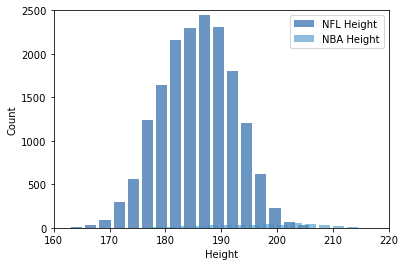

In [17]:
#Create the dual histogram
width = 2
thinkplot.PrePlot(2)
thinkplot.Hist(nflhist, align="right", width=width)
thinkplot.Hist(nbahist, align="left", width=width)
thinkplot.Config(xlabel='Height', ylabel='Count', xlim=[160, 220], ylim=[0,2500])

PMF charts allow us a more convinients way to look at this data, especially when we have a lot of data. 

In [18]:
#Create PMFs
nbapmf = thinkstats2.Pmf(nba)
nflpmf = thinkstats2.Pmf(nfl)

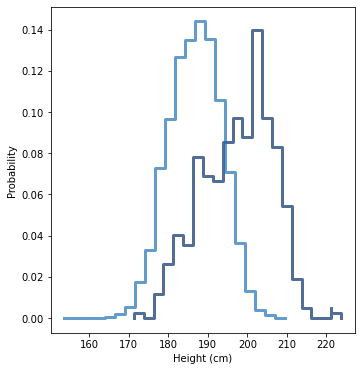

<Figure size 576x432 with 0 Axes>

In [19]:
#Graph
thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([nbapmf,nflpmf])
thinkplot.Show(xlabel="Height (cm)", ylabel = "Probability")

This graph is probably more useable, especially if we are using this data to try to draw conclusions or make predictions (which is the eventual point for all of this). For example, a glance at this chart tells us that about 15% of NBA players are ~205cm tall.

If you're familiar with some calculus, you'd integrate this PMF to get the probability within any range (though this depends on having an analytical distribution, or one defined by a mathmatical function)